In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [1]:
import numpy as np

# Load the .npz file
data = np.load('./blast_discrim.npz')

# Access the arrays stored in the file
for key in data.files:
    print(f"{key}: {data[key]}")

X: [[1.76 2.01]
 [1.18 1.55]
 [1.79 1.95]
 ...
 [2.09 2.26]
 [1.05 1.31]
 [1.41 1.2 ]]
Y: [1. 1. 1. ... 0. 0. 0.]


### <b>a. Histograms</b>

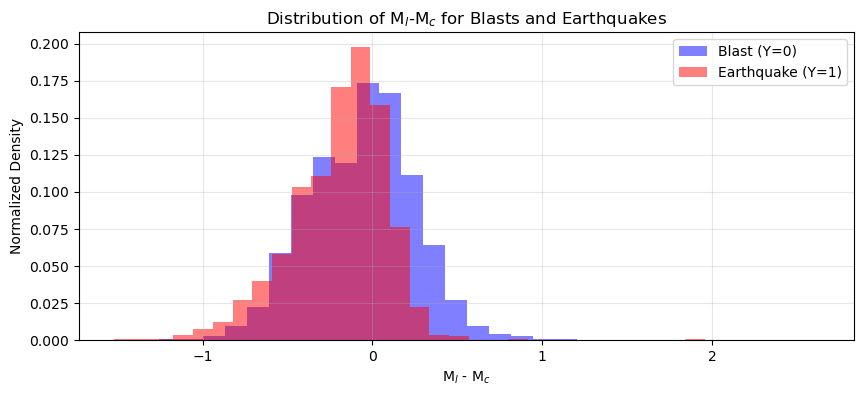

In [24]:
# Extract data and calculate difference
Ml = data['X'][:,0]
Mc = data['X'][:,1]
diff = Ml - Mc

# Create figure
plt.figure(figsize=(10, 4))

# Plot normalized histograms
mask_blast = data['Y'] == 0
mask_quake = data['Y'] == 1

plt.hist(diff[mask_blast], bins=30, alpha=0.5, 
         color='blue', label='Blast (Y=0)',
         weights=np.ones_like(diff[mask_blast])/len(diff[mask_blast]))
plt.hist(diff[mask_quake], bins=30, alpha=0.5, 
         color='red', label='Earthquake (Y=1)',
         weights=np.ones_like(diff[mask_quake])/len(diff[mask_quake]))

plt.xlabel('M$_l$ - M$_c$')
plt.ylabel('Normalized Density')
plt.title('Distribution of M$_l$-M$_c$ for Blasts and Earthquakes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### <b>b. Split data into partitions</b>

In [31]:
# Split with 75-25 ratio
X_train, X_test, y_train, y_test = train_test_split(
    data["X"], data["Y"], 
    test_size=0.25,
    random_state=42,
    stratify=data["Y"]  # Maintain class distribution
)

# Verify shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")
print(f"\nClass distribution:")
print(f"Train - Blast: {sum(y_train==0)}, Earthquake: {sum(y_train==1)}")
print(f"Test - Blast: {sum(y_test==0)}, Earthquake: {sum(y_test==1)}")

Training set: (4210, 2), (4210,)
Test set: (1404, 2), (1404,)

Class distribution:
Train - Blast: 3349, Earthquake: 861
Test - Blast: 1117, Earthquake: 287
